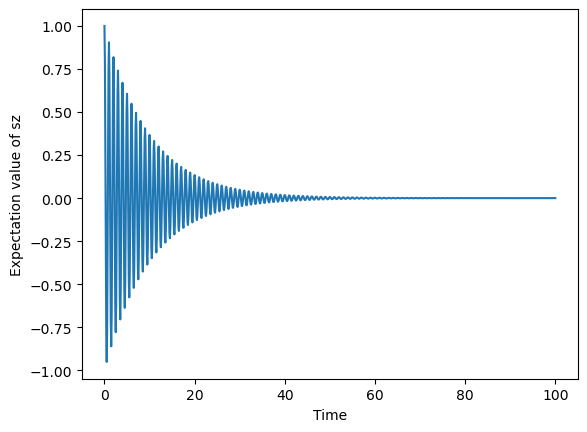

In [36]:
import numpy as np
from qutip import *

# Parameters of the quantum dot 
omega = 1.0 * 2 * np.pi  # Dot's transition frequency 
gamma = 0.1             # Dot's decay rate

# Dot's operators

sz = sigmaz()  # Pauli-Z operator 
sm = destroy(2)  # Annihilation operator

# Dot's Hamiltonian
H = omega / 2.0 * sz

# Dot's collapse operator
c_ops = [np.sqrt(gamma) * sm]

# Initial state = |1>
psi0 = basis(2, 1)  # Excited state

# Time vector for the simulation
t = np.linspace(0, 10/gamma, 1000)

# Solve the master equation
result = mesolve(H, psi0, t, c_ops, [sz])

# Plot the expectation value of the Pauli-Z operator
import matplotlib.pyplot as plt
plt.plot(result.times, np.exp(-gamma*result.times)*np.cos(omega*result.times))
plt.xlabel('Time')
plt.ylabel('Expectation value of sz')
plt.show()


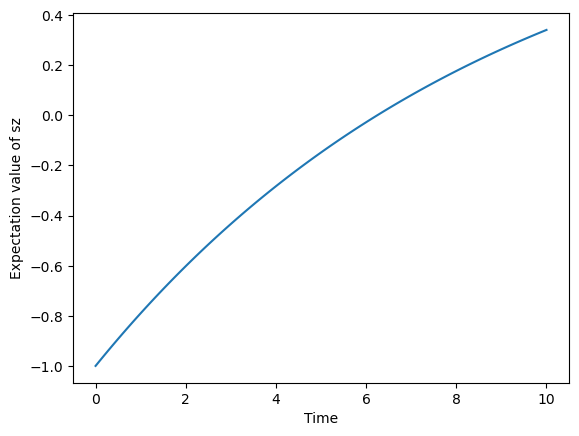

In [45]:
import numpy as np
from qutip import *

# Parameters of the quantum dot 
omega = 1.0 * 2 * np.pi  # Dot's transition frequency 
gamma = 0.1             # Dot's decay rate
gamma_thermal = 0.01    # Dot's thermal decay rate 
n = 0.1                 # Mean # of thermal photons

# Dot's operators
sz = sigmaz()  # Pauli-Z operator
sm = destroy(2)  # Annihilation operator

# Dot's Hamiltonian
H = omega / 2.0 * sz

# Dot's collapse operator
c_ops = [np.sqrt(gamma) * sm]

# Dot's thermal noise collapse operator
c_thermal = np.sqrt(gamma_thermal * (n + 1)) * sm 
c_ops.append(c_thermal)

# Initial state = |1>
psi0 = basis(2, 1)  # Excited state

# Time vector for the simulation
t = np.linspace(0, 10, 100)

# Solve the master equation
result = mesolve(H, psi0, t, c_ops, [sz])

# Plot the expectation value of sz over time
import matplotlib.pyplot as plt
plt.plot(result.times, result.expect[0])
plt.xlabel('Time')
plt.ylabel('Expectation value of sz')
plt.show()


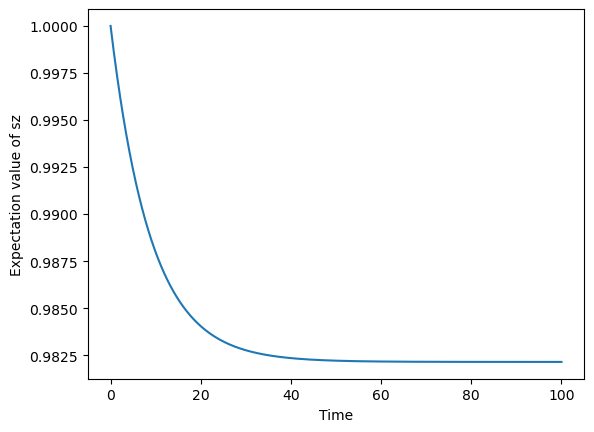

In [13]:
omega = 1.0 * 2 * np.pi  # Transition frequency of the dot
gamma = 0.1             # Decay rate of the dot
gamma_thermal = 0.01    # Decay rate due to thermal bath
n = 0.1                 # Mean number of thermal photons

# Define the operators
sz = sigmaz()  # Pauli-Z operator
sm = destroy(2)  # Annihilation operator

# Define the Hamiltonian
H = omega / 2.0 * sz

# Define the collapse operators
c_ops = [np.sqrt(gamma) * sm]

# Add thermal noise collapse operator
c_thermal = np.sqrt(gamma_thermal * (n + 1)) * sm + np.sqrt(gamma_thermal * n) * sm.dag()
c_ops.append(c_thermal)

# Define the initial state
psi0 = basis(2, 0)  # Starting in the ground state

# Define the time points to evaluate the solution
t = np.linspace(0, 100, 1000)

# Solve the master equation
result = mesolve(H, psi0, t, c_ops, [sz])

# Plot the expectation value of sz over time
import matplotlib.pyplot as plt
plt.plot(result.times, result.expect[0])
plt.xlabel('Time')
plt.ylabel('Expectation value of sz')
plt.show()
